# Imports

 * Let's first import all necessary packages
 * Matplotlib and seaborn for plotting and cv2 for creating videos from images.

In [2]:
import cv2
import numpy as np
import os

from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sns
import time

# set font and its style for the plots
sns.set_theme(style='white',font_scale=1.25)
rc('font',**{'family':'sans-serif','serif':['Verdana']})
from matplotlib import pyplot as plt

#Set random seed
np.random.seed(42)

* Install the package that supports latex for matplotlib (takes sometime, you may need to restart). This is optional

In [3]:
%%capture
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

In [4]:
%matplotlib inline
#import 3D axes
from mpl_toolkits import mplot3d

* Define a function to compile a video from images

In [5]:
def create_video(path_to_images:str,out_file_name:str):
  image_folder = path_to_images
  video_name = out_file_name

  fourcc = cv2.VideoWriter_fourcc(*'mp4v')

  images = sorted([img for img in os.listdir(image_folder) if img.endswith(".png")])
  frame = cv2.imread(os.path.join(image_folder, images[0]))
  height, width, layers = frame.shape

  video = cv2.VideoWriter(video_name, fourcc,30,(width,height))

  for image in images:
      video.write(cv2.imread(os.path.join(image_folder, image)))

  video.release()
  return 1

#**Batch Gradient Descent**



*   Sample (at least two) data points  from a sigmoid function $f(x)=\frac{1}{1+exp(-(wx+b))}$, where the values for $w,b$ are arbitrary.
*   For convenience, we limit the domain of $w$ and $b$ between $(-6,6)$
* Compute loss for all combinations of $w$ and $b$ and plot the error surface.
* Do gradient descent by randomly initializing $(w,b)$.

* Use the following update rule
$$ w_{t+1}=w_t - \eta \nabla \mathscr{L}(w_t)$$



In [6]:
# supporting definitions
def f(w,b,x):
  return 1.0/(1.0+np.exp(-(w*x+b)))

def error(w,b):
    err = 0.0
    for x,y in zip(X,Y):
        fx=f(w,b,x)
        err += 0.5*(fx-y)**2
    return err

def grad_b(w,b,x,y):
    fx = f(w,b,x)
    return (fx-y)*fx*(1-fx)

def grad_w(w,b,x,y):
    fx=f(w,b,x)
    return (fx-y)*fx*(1-fx)*x

def do_gradient_descent(max_epochs):
    w,b,eta = -2,-4,1.0
    w_trace,b_trace = [],[]
    loss_trace = []
    for i in range(max_epochs):
        dw,db = 0,0
        loss_trace.append(error(w,b))
        for x,y in zip(X,Y):
            dw += grad_w(w,b,x,y)
            db += grad_b(w,b,x,y)
        w = w - eta * dw
        b = b - eta * db
        w_trace.append(w)
        b_trace.append(b)
    return w_trace,b_trace,loss_trace


* Let's sample a few datapoints ( two is sufficient) from a function

In [7]:
num_samples = 2

X = np.array([0.5,2.5])
Y = np.array([0.2,0.9]) # target value from sigmoid function with fixed weight and bias value

# generate search space of w and b
w = np.linspace(-6,6,50)
b = np.linspace(-6,6,50)
w,b = np.meshgrid(w,b)
loss = np.zeros(w.shape)

# create loss surface
for x,y in zip(X,Y):
  z = x*w+b
  y_hat = 1/(1+np.exp(-z))
  loss = (loss+np.square((y_hat-y)))
loss = (0.5)*loss

## Gradient Descent

In [8]:
def do_gradient_descent(max_epochs):
    w,b,eta = -2,-2,0.1

    #track w and b for plotting
    w_trace,b_trace = [],[]
    loss_trace = []

    for i in range(max_epochs):
        w_trace.append(w)
        b_trace.append(b)
        dw,db = 0,0

        #compute gradients
        loss_trace.append(error(w,b))
        for x,y in zip(X,Y):
            dw += grad_w(w,b,x,y)
            db += grad_b(w,b,x,y)

        #update parameters
        w = w - eta * dw
        b = w - eta * db


    return w_trace,b_trace,loss_trace

In [9]:
w_trace,b_trace,loss_trace=do_gradient_descent(500)

#convert the list to np array
w_trace = np.around(np.array(w_trace),decimals=3)
b_trace = np.around(np.array(b_trace),decimals=3)
loss_trace =np.around(np.array(loss_trace),decimals=3)

### Check orientation and trajectory before animating

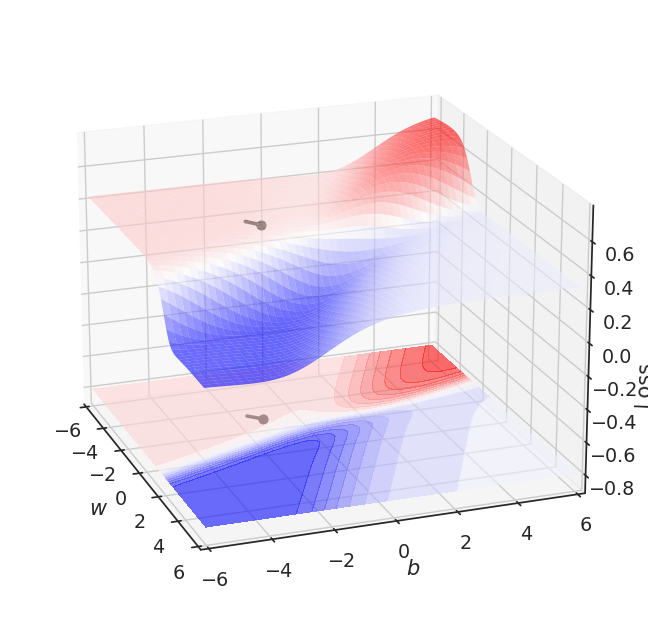

In [10]:
#do surface plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
dz = 0 # offset loss surface for displaying purpose
ax.cla()
ax.plot_surface(w, b,loss,color='r',cmap='bwr',rstride=1, cstride=1,edgecolor='none',alpha=0.6) # alpha=1
ax.scatter(w_trace[499],b_trace[499],zs=loss_trace[499]+dz,s=40,c='k',marker='o')
ax.plot(w_trace,b_trace,zs=loss_trace+dz,linewidth=2.5,c='k')
ax.contourf(w,b,loss,levels=20,zdir='z',cmap='bwr',offset=np.min(loss)-0.8,alpha=0.6)
ax.scatter(w_trace[499],b_trace[499],zs=np.min(loss)-0.8,s=40,c='k',marker='o')
ax.plot(w_trace,b_trace,zs=np.min(loss)-0.8,linewidth=2.5,c='k')
ax.set_xlabel(r'$w$')
ax.set_ylabel(r'$b$')
# ax.set_zlabel('Loss',labelpad=0.4)
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_alpha(0.5)
# ax.set_zlim(bottom=np.min(loss)-0.5,top=np.max(loss)+0.2)
ax.view_init(elev=20,azim=-20)
ax.text3D(7.5,7.2,-0.3,'Loss',zdir='z')

# ax.set_facecolor([0.5,0.5,0.5])
plt.show()


## 2D surface and contour plot

 * Executing the cell below generates 500 images in the working directory
 * We then call the `create_video` function to compose a video. Done!

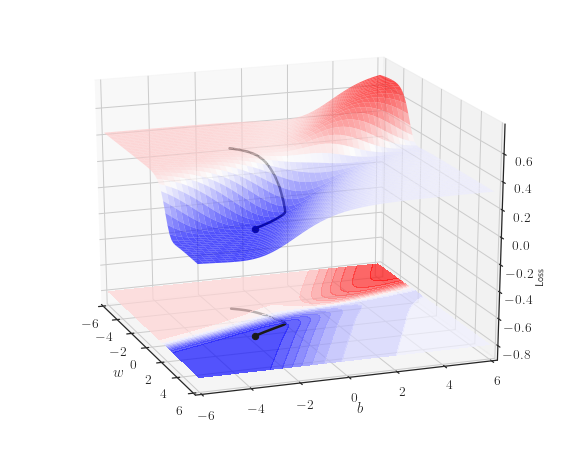

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10,8)
ax = fig.add_subplot(111, projection='3d')
dz = 0 # offset loss surface for displaying purpose
for i in range(500):
    ax.cla()
    ax.plot_surface(w, b,loss+dz, rstride=1, cstride=1,cmap='bwr',edgecolor='none',alpha=0.7)
    ax.scatter(w_trace[i],b_trace[i],zs=loss_trace[i]+dz,s=40,c='k',marker='o')
    ax.plot(w_trace[0:i],b_trace[0:i],zs=loss_trace[0:i]+dz,linewidth=2.5,c='k')
    ax.contourf(w,b,loss,levels=20,zdir='z',cmap='bwr',offset=np.min(loss)-0.8,alpha=0.7)
    ax.scatter(w_trace[i],b_trace[i],zs=np.min(loss)-0.8,s=40,c='k',marker='o')
    ax.plot(w_trace[0:i],b_trace[0:i],zs=np.min(loss)-0.8,linewidth=2.5,c='k')
    ax.set_xlabel(r'$w$')
    ax.set_ylabel(r'$b$')
    # ax.set_zlabel('Loss',labelpad=0.4)
    ax.set_xlim(-6,6)
    ax.set_ylim(-6,6)
    # ax.set_zlim(bottom=np.min(loss)-0.5,top=np.max(loss)+0.2)
    ax.view_init(elev=20,azim=-20)
    ax.text3D(7.5,7.2,-0.3,'Loss',zdir='z')
    plt.savefig(f"{i:03d}.png",bbox_inches='tight')


In [ ]:
create_video('.','gd.mp4')

1

##Contour and sigmoid plot

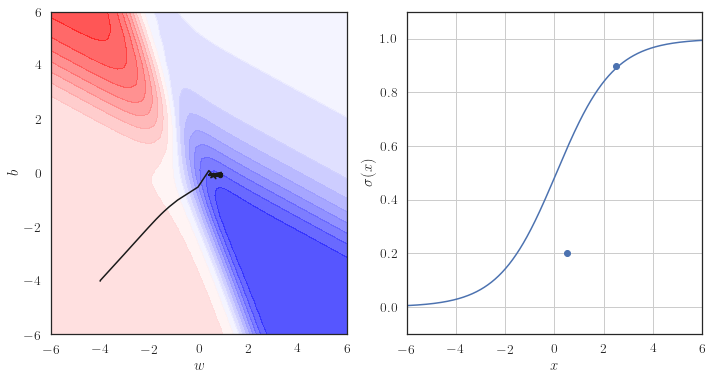

In [ ]:
x = np.linspace(-6,6,500)
# fig,ax = plt.subplots(1,2,figsize=(6,6))
gridsize = (3,3)
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((4,4),(0,0),colspan=2,rowspan=2)
ax2 = plt.subplot2grid((4,4),(0,2),colspan=2,rowspan=2)

for i in range(500):
  ax1.cla()
  ax2.cla()
  ax1.contourf(w,b,loss,levels=20,cmap='bwr',alpha=0.7)
  ax1.scatter(w_trace[i],b_trace[i],s=20,c='k',marker='o')
  ax1.plot(w_trace[0:i],b_trace[0:i],linewidth=1.5,c='k')
  ax1.set_xlim((-6,6))
  ax1.set_ylim((-6,6))
  ax1.set_xlabel(r'$w$')
  ax1.set_ylabel(r'$b$')
  #plot sigmoid
  ax2.plot(x,f(w_trace[i],b_trace[i],x))
  ax2.scatter(X,Y)
  ax2.set_xlim((-6,6))
  ax2.set_ylim((-0.1,1.1))
  ax2.set_xlabel(r'$x$')
  ax2.set_ylabel(r'$\sigma(x)$')
  ax2.grid(True)
  plt.tight_layout()
  plt.savefig(f"{i:03d}.png",bbox_inches='tight')



In [ ]:
create_video('.','lineSearch.mp4')

1

<Figure size 720x720 with 0 Axes>

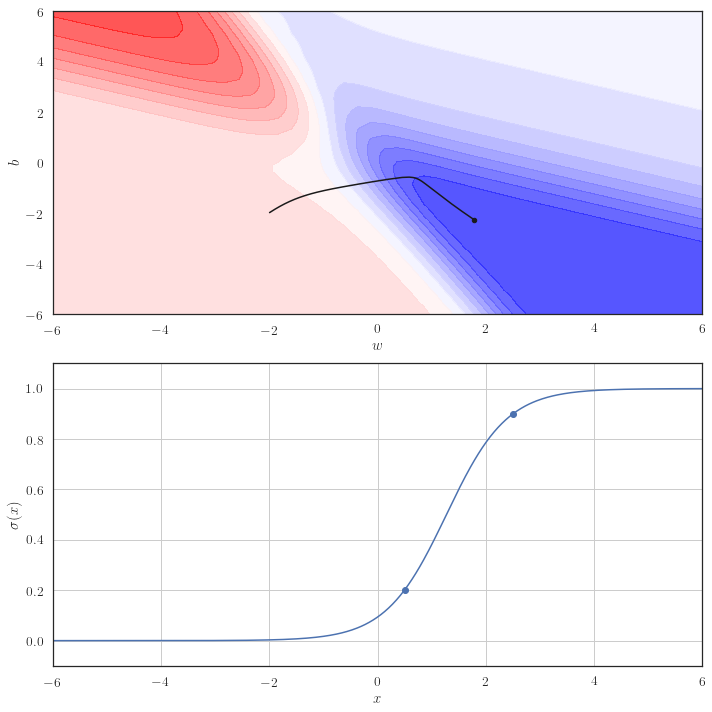

In [ ]:
x = np.linspace(-6,6,500)
# fig,ax = plt.subplots(1,2,figsize=(6,6))
gridsize = (3,3)
fig = plt.figure(figsize=(10,10))
fig,ax = plt.subplots(2,1,figsize=(10,10))
for i in range(500):
  ax[0].cla()
  ax[1].cla()
  ax[0].contourf(w,b,loss,levels=20,cmap='bwr',alpha=0.7)
  ax[0].scatter(w_trace[i],b_trace[i],s=20,c='k',marker='o')
  ax[0].plot(w_trace[0:i],b_trace[0:i],linewidth=1.5,c='k')
  ax[0].set_xlim((-6,6))
  ax[0].set_ylim((-6,6))
  ax[0].set_xlabel(r'$w$')
  ax[0].set_ylabel(r'$b$')
  #plot sigmoid
  ax[1].plot(x,f(w_trace[i],b_trace[i],x))
  ax[1].scatter(X,Y)
  ax[1].set_xlim((-6,6))
  ax[1].set_ylim((-0.1,1.1))
  ax[1].set_xlabel(r'$x$')
  ax[1].set_ylabel(r'$\sigma(x)$')
  ax[1].grid(True)
  plt.tight_layout()
  plt.savefig(f"{i:03d}.png",bbox_inches='tight')



* For other optimizers, we just need to change the update rule.
* For Adaptive optimizers, we need to make the input sparse.